In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path  = "/content/drive/MyDrive/Projects/AIML/Practice/01_Regression/02_vehicle dataset/data/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#data = pd.read_csv(path +'CAR DETAILS FROM CAR DEKHO.csv')
data = pd.read_csv(path +'car data.csv')

In [5]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.nunique(axis = 1)
data.shape

(301, 9)

In [6]:
data.dropna(axis =1, inplace = True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [23]:
data.describe()
data.shape

(301, 9)

In [18]:
#check for missing information
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
data['Age'] = 2022 - data['Year']
data.drop('Year', axis = 1, inplace = True)



In [12]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# EDA

In [13]:
print(data['Car_Name'].unique())
print(data['Age'].unique())
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [7]:
# To check if there are any outliers

data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,8.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,4.000000
25%,0.900000,1.200000,15000.000000,0.000000,6.000000
50%,3.600000,6.400000,32000.000000,0.000000,8.000000
75%,6.000000,9.900000,48767.000000,0.000000,10.000000
90%,9.500000,14.790000,65000.000000,0.000000,12.000000
95%,14.500000,22.780000,80000.000000,0.000000,14.000000
99%,23.000000,35.960000,142000.000000,1.000000,17.000000


In [20]:
#there are some two wheelers in the given data set

print(data[data['Car_Name'].str.contains( 'Bajaj')].shape)
print(data[data['Car_Name'].str.contains( 'Hero')].shape)
print(data[data['Car_Name'].str.contains( 'Honda')].shape)
print(data[data['Car_Name'].str.contains( 'TVS ')].shape)

(25, 9)
(15, 9)
(19, 9)
(8, 9)


In [15]:
len(data['Car_Name'].unique())
data[['Car_Name','Age']].groupby('Car_Name', axis = 0).count()

,Age
Car_Name,
800,1
Activa 3g,2
Activa 4g,1
Bajaj ct 100,1
Bajaj Avenger 150,1
...,...
sx4,6
verna,14
vitara brezza,1


In [33]:
data.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

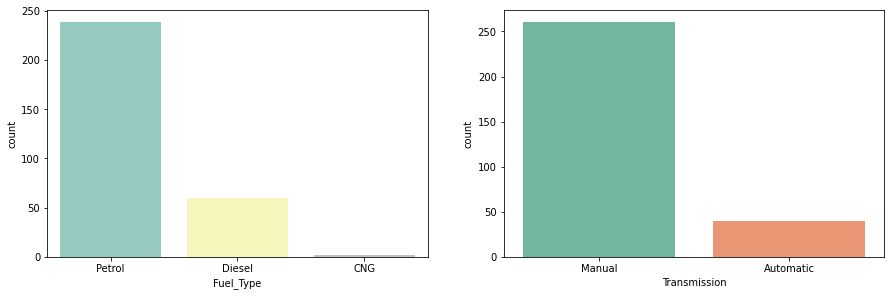

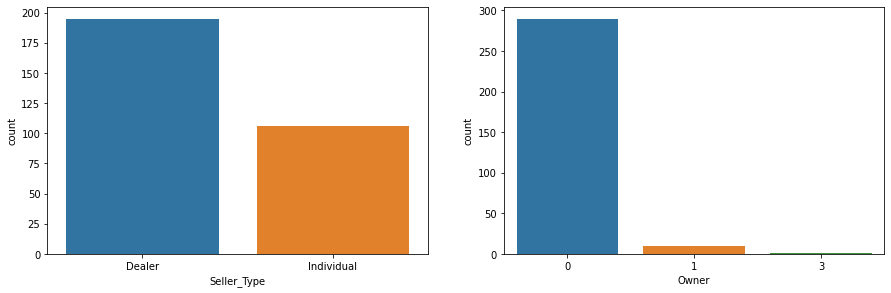

In [16]:
#plotting catagorical features

plt.figure(figsize = [15,10])
plt.subplot(2,2,1)

#ax[0][0].bar(data['Fuel_Type'].value_counts(), height = 500)
#data['Fuel_Type'].value_counts()
sns.countplot(x = 'Fuel_Type', data = data, palette="Set3")

plt.subplot(2,2,2)

#ax[0][0].bar(data['Fuel_Type'].value_counts(), height = 500)
#data['Fuel_Type'].value_counts()
sns.countplot(x = 'Transmission', data = data, palette="Set2")
plt.show()
plt.figure(figsize = [15,10])
plt.subplot(2,2,1)

#ax[0][0].bar(data['Fuel_Type'].value_counts(), height = 500)
#data['Fuel_Type'].value_counts()
sns.countplot(x = 'Seller_Type', data = data)

plt.subplot(2,2,2)

#ax[0][0].bar(data['Fuel_Type'].value_counts(), height = 500)
#data['Fuel_Type'].value_counts()
sns.countplot(x = 'Owner', data = data)

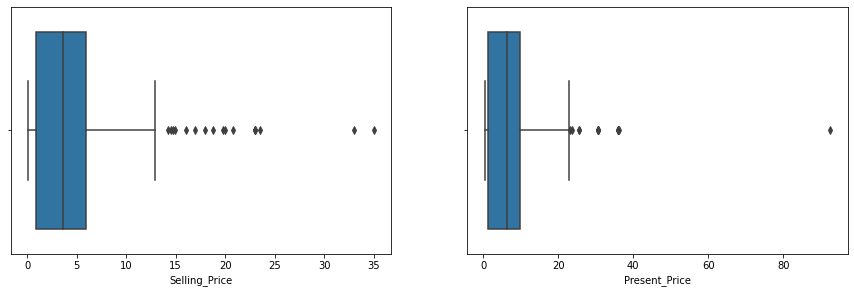

In [17]:
plt.figure(figsize= [15,10])
plt.subplot(2,2,1)
sns.boxplot(x = 'Selling_Price',data = data)

plt.subplot(2,2,2)
sns.boxplot(x = 'Present_Price',data = data)

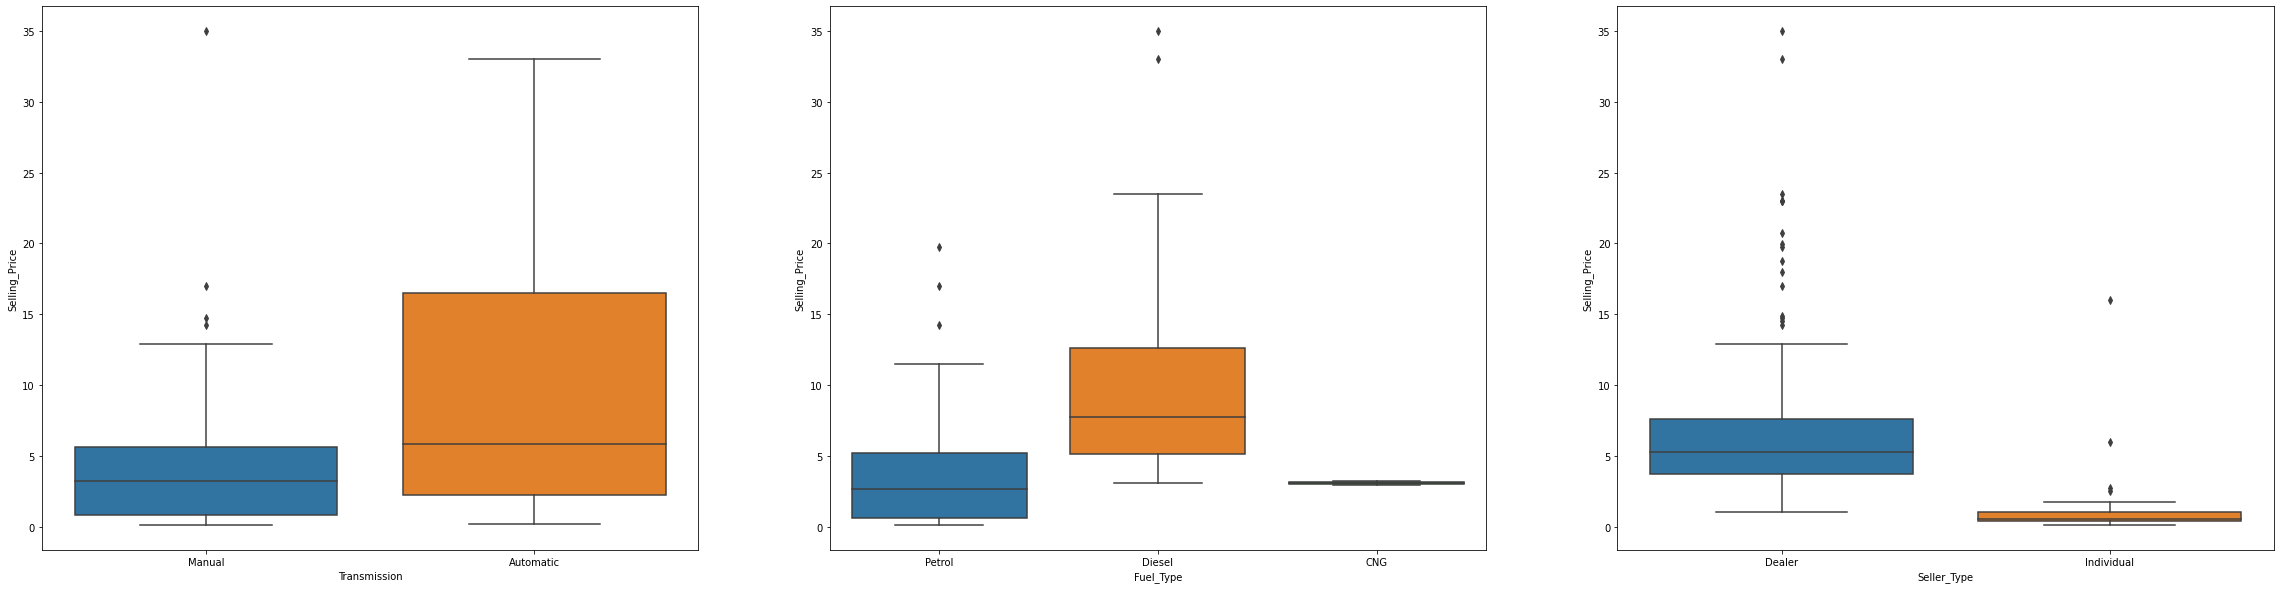

In [30]:
plt.figure(figsize = [40,10])
plt.subplot(1,3,1)
sns.boxplot(x = 'Transmission', y = 'Selling_Price',data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'Fuel_Type', y = 'Selling_Price',data = data)
plt.subplot(1,3,3)
sns.boxplot(x = 'Seller_Type', y = 'Selling_Price',data = data)


In [32]:
#identifing Outliers
#selling price
data[data['Selling_Price'] > data['Selling_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,7
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [33]:
#Present_Price
data[data['Present_Price'] > data['Present_Price'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [34]:
#Age
data[data['Age'] > data['Age'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
37,800,0.35,2.28,127000,Petrol,Individual,Manual,0,19
39,sx4,2.25,7.98,62000,Petrol,Dealer,Manual,0,19
77,corolla,1.50,12.35,135154,Petrol,Dealer,Automatic,0,18


In [35]:
#KM Driven
data[data['Kms_Driven'] > data['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,17
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,12
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,14


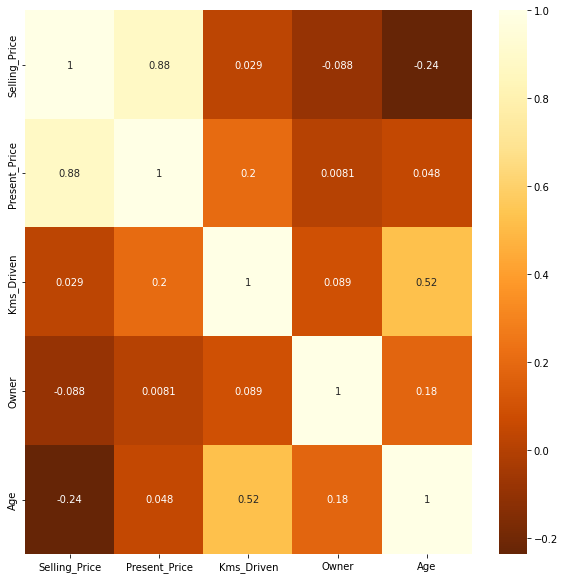

In [44]:
#multivariate Analysis
plt.figure(figsize=[10,10])
sns.heatmap(data.corr(), annot  = True, cmap ='YlOrBr_r')

# Modelling

In [46]:
#removing Car name
data.drop(['Car_Name'], axis = 1, inplace = True)

In [47]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [49]:
data  = pd.get_dummies(data, columns = ['Fuel_Type','Seller_Type','Transmission'], drop_first = True)

In [52]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1



1.   Fuel attribute is now divided into two new attributes where '01' denotes 
Petrol, '10' denotes Diesel and '00' denotes CNG.
2.   Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
1.   Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer and '0' Seller_Type_Individual.








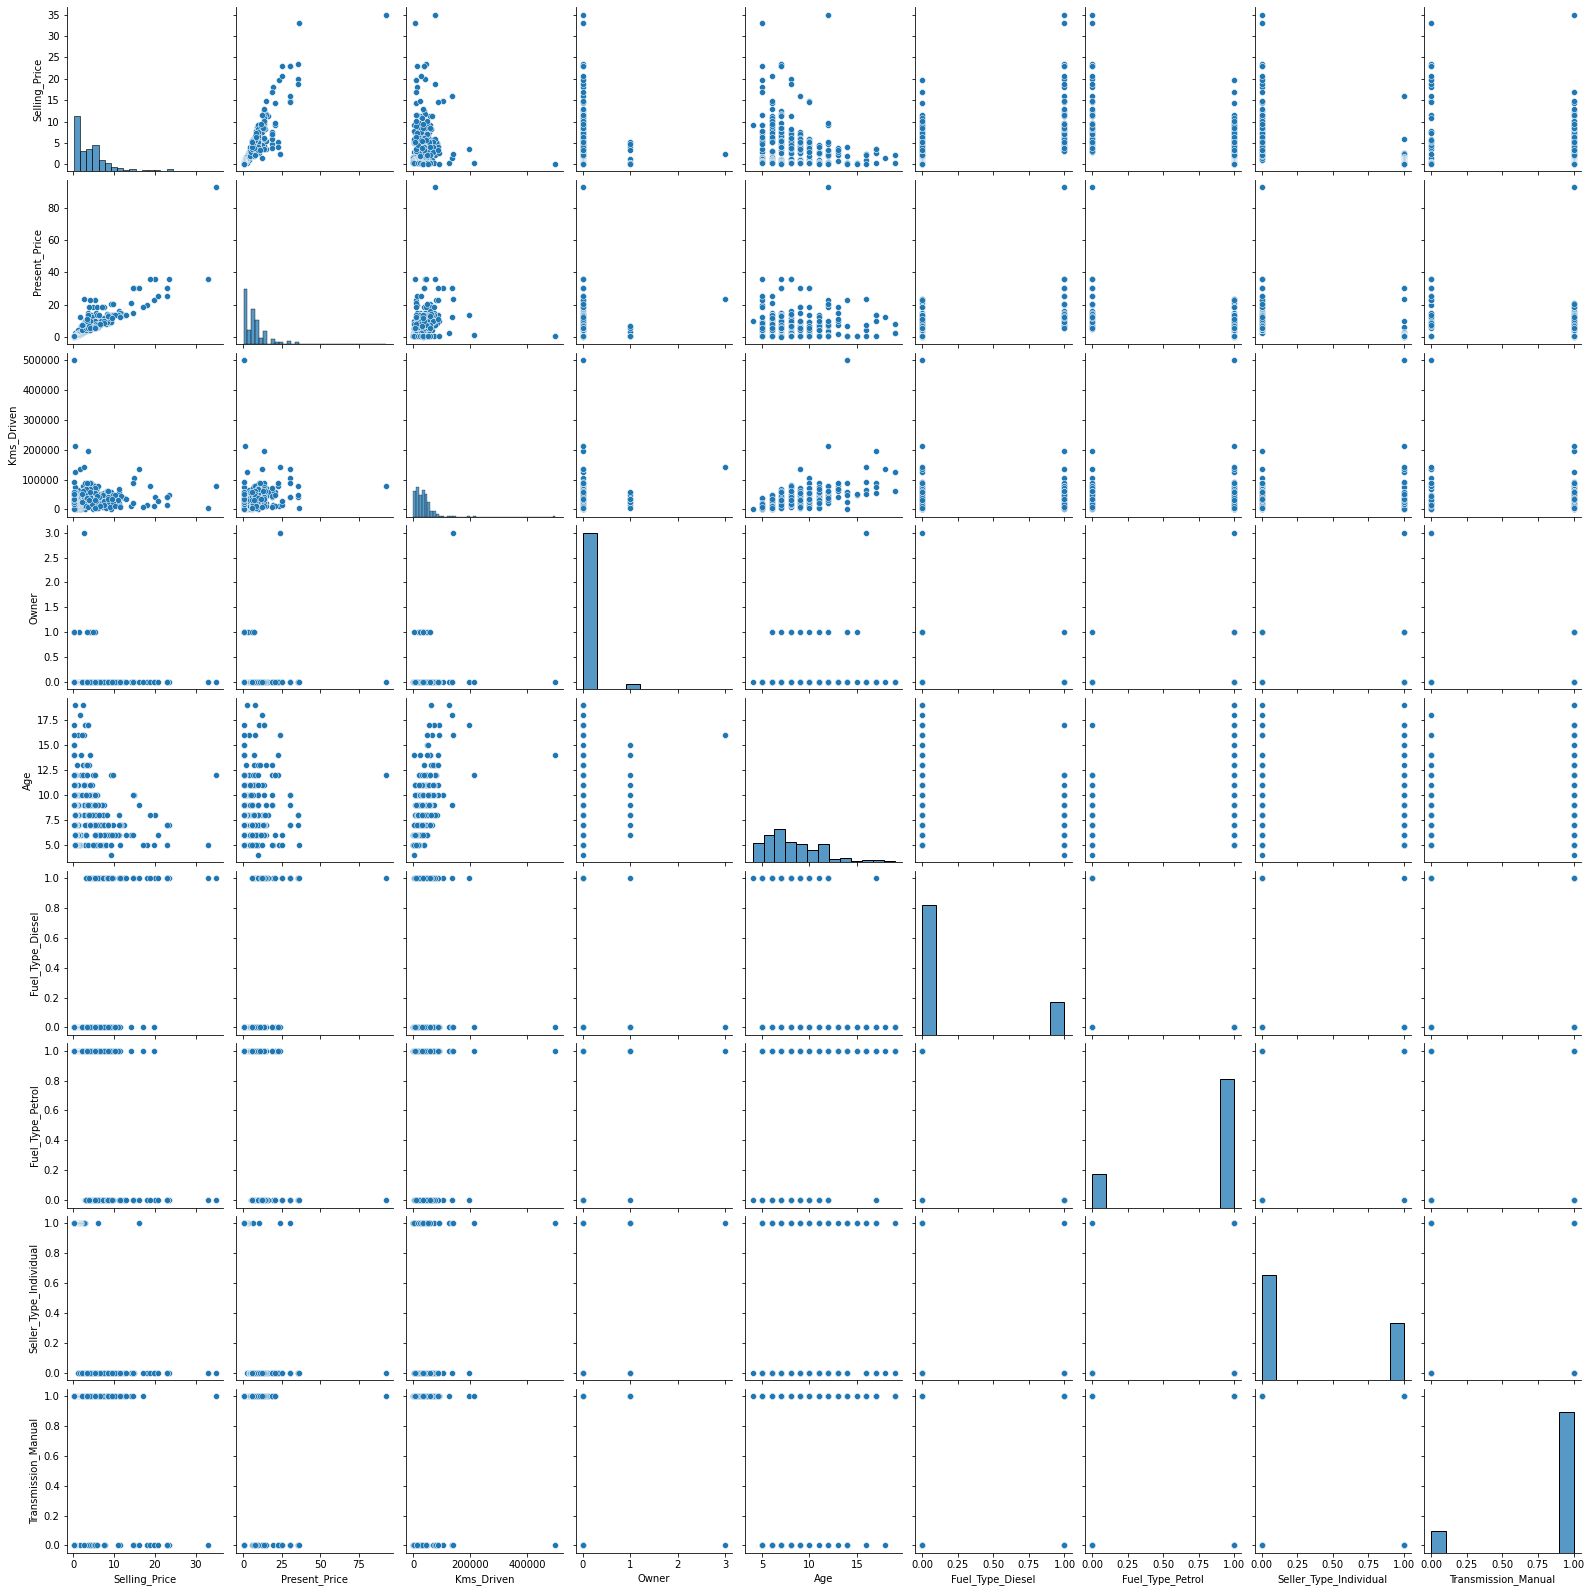

In [54]:
sns.pairplot(data)

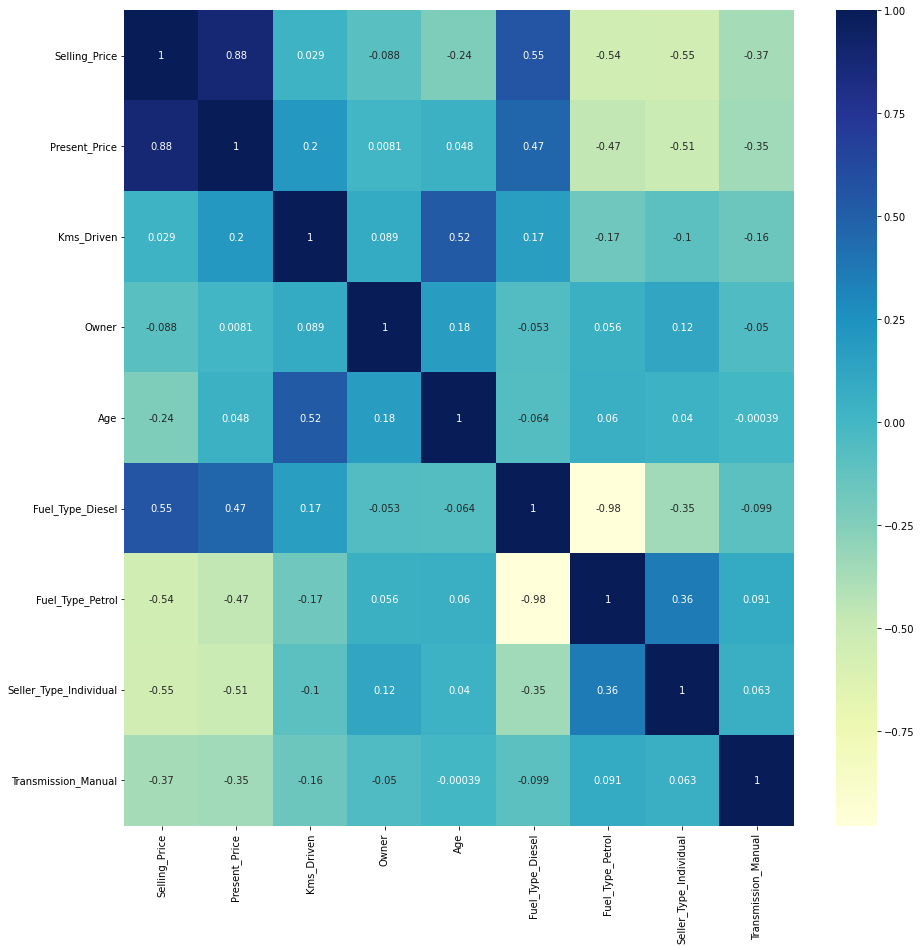

In [57]:
plt.figure(figsize = [15,15])
sns.heatmap(data.corr(), annot=True, cmap = 'YlGnBu' )

# Creating a Regression Model

In [65]:
#Train Test Split
from sklearn.model_selection import train_test_split
X = data.drop('Selling_Price', axis = 1)
y = data['Selling_Price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)

In [122]:
from scipy.stats.stats import median_absolute_deviation
#https://www.kaggle.com/code/mohaiminul101/car-price-prediction
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

CV = []
R2_train = []
R2_test = []

def car_pred_model(model, model_name):
  model.fit(X_train,y_train)

  #r2 train
  y_pred_train = model.predict(X_train)
  R2_train_score =  r2_score(y_train, y_pred_train)
  R2_train.append( R2_train_score )

  #r2 test
  y_pred_test = model.predict(X_test)
  R2_test_score = r2_score(y_train, y_pred_train)
  R2_test.append(R2_test_score)

  #R2 mean of train set using cv
  cv =  cross_val_score(model, X_train, y_train, cv = 5)
  cv_mean = cv.mean()
  CV.append(cv_mean)

  


  #printing results
  print("*"*50)
  print("Train R2 Score - ",R2_train_score )
  print("Test R2 Score - ",R2_test_score )
  print("cv scores - ", cv)
  print("cv mean - ", cv_mean)
  print("MSE - ", mean_squared_error(y_test, y_pred_test))
  print("RMSE - ", np.sqrt(mean_squared_error(y_test, y_pred_test)))
  print("MAE - ", mean_absolute_error(y_test, y_pred_test))

  print("*"*50)


  #graphs
  fig, ax = plt.subplots(1,4, figsize = [20,5])
  ax[0].set_title('Residual Plot of Train Sample')
  sns.distplot((y_train, y_pred_train), ax= ax[0])
  ax[0].set_xlabel('y_train')
  ax[0].set_ylabel('y_train-y_train')

  ax[1].set_title('Residual Plot of Test Sample')
  sns.distplot((y_test, y_pred_test), ax= ax[1])
  ax[1].set_xlabel('y_test')
  ax[1].set_ylabel('y_test-y_test')


  #scatter plot
  ax[2].set_title('y_test vs y_pred_test')
  sns.scatterplot(x= range(len(y_test)), y = y_test, palette = 'blue', legend = 'full', ax = ax[2] )
  sns.scatterplot(x= range(len(y_test)), y = y_pred_test, palette = 'red', legend = 'full', ax = ax[2])
  #ax[2].scatter(x= range(len(y_test)), y = y_pred_test, color = 'red')
    #plt.scatter(range(len(y_test)), y_test, color='blue')
    #plt.scatter(range(len(y_pred)), y_pred, color='red')
  
  ax[2].set_xlabel('range')
  ax[2].set_ylabel('y_pred_test')

  sns.lineplot(x = range(len(y_test)), y= y_test, ax = ax[3])
  sns.lineplot(x = range(len(y_pred_test)), y= y_test, ax = ax[3])

    
  plt.show()





In [97]:
y_test

263     6.60
33      6.00
293     3.25
75      3.95
253     7.20
       ...  
218     6.45
66     19.75
37      0.35
133     0.72
109     1.20
Name: Selling_Price, Length: 61, dtype: float64

**************************************************
Train R2 Score -  0.8958631922994429
Test R2 Score -  0.8958631922994429
cv scores -  [0.83775629 0.8548334  0.87642584 0.84470094 0.84940034]
cv mean -  0.8526233636443201
MSE -  5.496293081442145
RMSE -  2.344417429009208
MAE -  1.3822193160183938
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


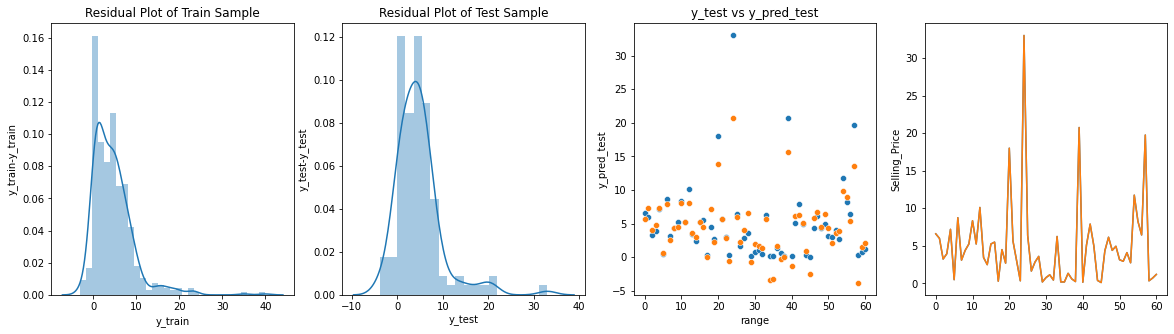

In [123]:
#simple Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#lr.fit(X_train, y_train)
car_pred_model(lr,'Linear Regression')

**************************************************
Train R2 Score -  0.8892852520366332
Test R2 Score -  0.8892852520366332
cv scores -  [0.83702133 0.84827689 0.88184393 0.86354428 0.85726692]
cv mean -  0.8575906686612041
MSE -  5.832080629672446
RMSE -  2.4149701094780545
MAE -  1.3812149733845624
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


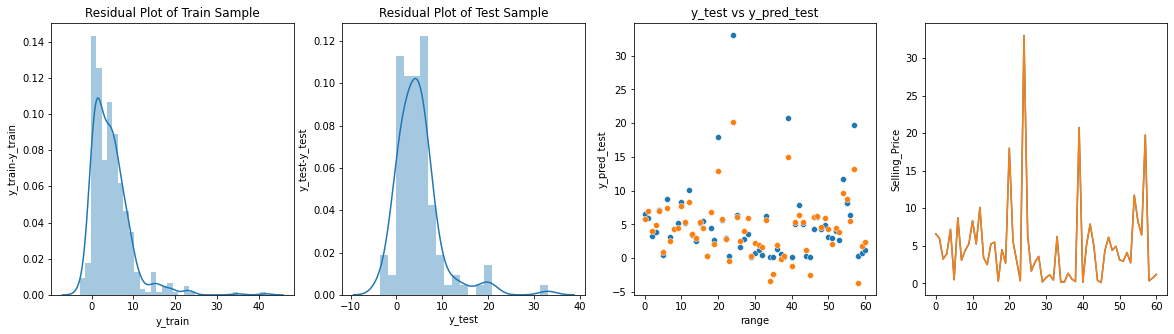

In [124]:
# Lasso Regression, L1

from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

lasso = Lasso()

# range of alpha 
alpha = np.logspace(-3,3,num=14)

lr_lasso = RandomizedSearchCV(estimator = lasso, param_distributions=dict(alpha = alpha))
car_pred_model(lr_lasso,'Lasso')


**************************************************
Train R2 Score -  0.8871654675346001
Test R2 Score -  0.8871654675346001
cv scores -  [0.84040326 0.84438247 0.88316137 0.86290836 0.86467306]
cv mean -  0.859105704064979
MSE -  5.75122498713226
RMSE -  2.398171175527773
MAE -  1.3843908285318247
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


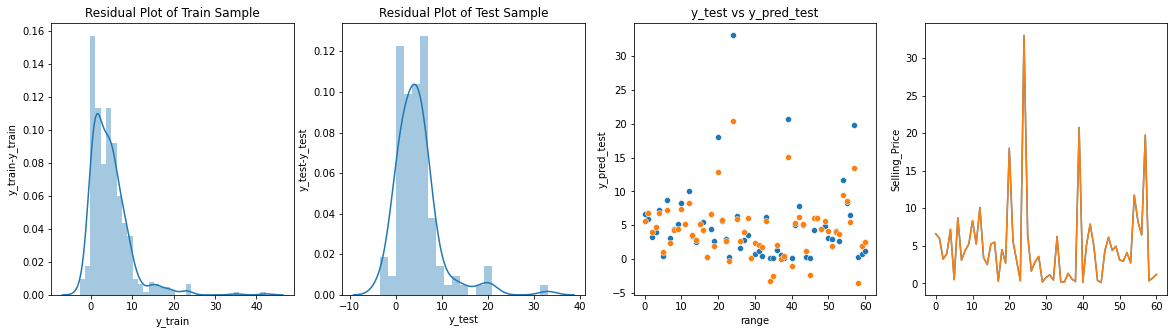

In [125]:
# Ridge Regression, L2

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge()

# range of alpha 
alpha = np.logspace(-3,3,num=14)

lr_ridge = RandomizedSearchCV(estimator = ridge, param_distributions=dict(alpha = alpha))
car_pred_model(lr_ridge,'Lasso')

**************************************************
Train R2 Score -  0.9821198388033142
Test R2 Score -  0.9821198388033142
cv scores -  [0.90333708 0.80272466 0.94884402 0.94071463 0.91464917]
cv mean -  0.9020539133642507
MSE -  2.6309458870977327
RMSE -  1.6220190772915504
MAE -  0.6363889307072004
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


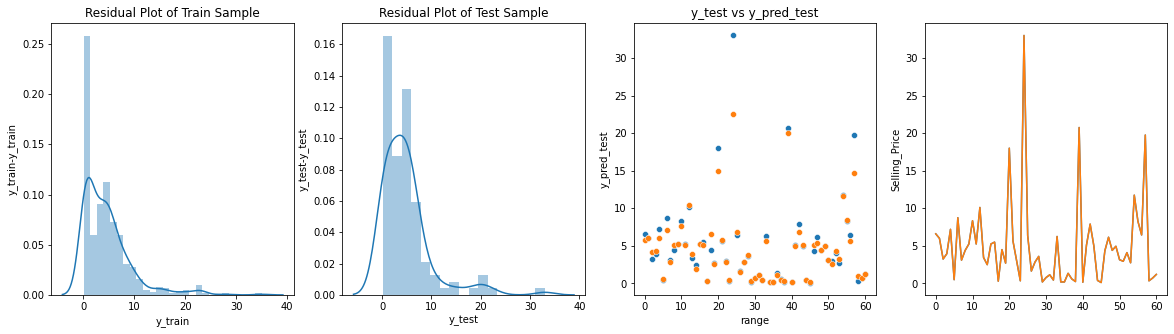

In [126]:
#random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

car_pred_model(rf_rs,'random_forest')

**************************************************
Train R2 Score -  0.9999886007422136
Test R2 Score -  0.9999886007422136
cv scores -  [0.96743035 0.80561032 0.96254544 0.97594447 0.9106756 ]
cv mean -  0.9244412359266594
MSE -  2.3705371460353644
RMSE -  1.5396548788723285
MAE -  0.7153538421541623
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


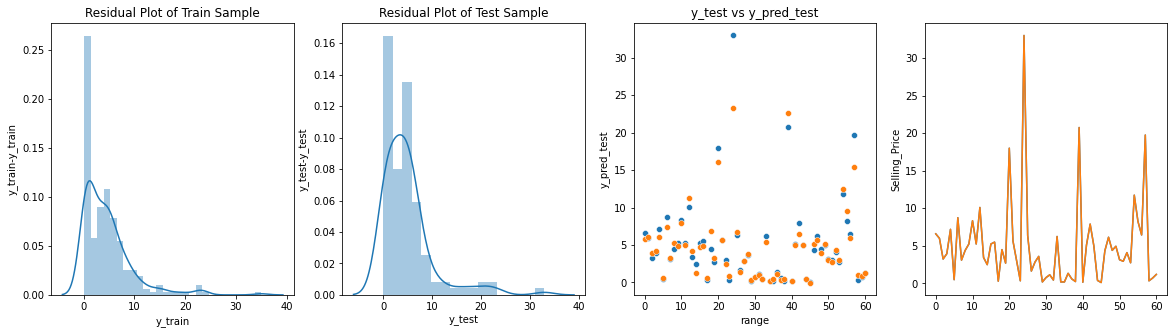

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

car_pred_model(gb_rs,"gradient_boosting")

**************************************************
Train R2 Score -  -0.021189207578077296
Test R2 Score -  -0.021189207578077296
cv scores -  [-23.6345535  -50.77171718 -26.63848427 -10.7991108  -15.80731445]
cv mean -  -25.530236041521853
MSE -  35.74564513454339
RMSE -  5.978766188315395
MAE -  3.456962780791153
**************************************************


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


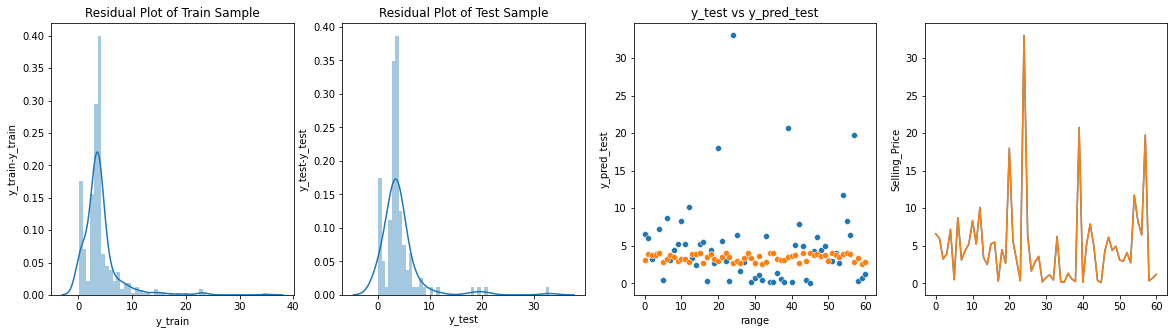

In [133]:
from  sklearn.svm import SVR

param = {
    'C' : [0.001,0.01,0.1,10,100],
    'kernel' : ['rbf','poly']
}
rf_svc = RandomizedSearchCV(estimator = SVR(), param_distributions =param,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)
#rf_svc.fit(X_train,y_train)
car_pred_model(rf_svc,'SVM')




In [134]:
Technique = ["LinearRegression","Lasso","Ridge","RandomForestRegressor","GradientBoostingRegressor", 'SVM']
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.895863,0.895863,0.852623
1,Lasso,0.889285,0.889285,0.857591
2,Ridge,0.887165,0.887165,0.859106
3,RandomForestRegressor,0.982120,0.982120,0.902054
4,GradientBoostingRegressor,0.999989,0.999989,0.924441
5,SVM,-0.021189,-0.021189,-25.530236
